In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('../styles_and_utils/graphstyle.mplstyle')

import sys
sys.path.insert(1, '../')
from styles_and_utils import *

In [2]:
# pandas
import pandas as pd
def df2np(df, model):
    df = df.loc[df['Model'] == model, 'SSIM']
    return df.to_numpy().T

# Load Knee results
knee_df = pd.read_excel('./data/Knee_results.xlsx')

knee_unt_031M = df2np(knee_df, 'U-Net-31M')
knee_vit_032M = df2np(knee_df, 'ViT-32M/10')
knee_convit_032M = df2np(knee_df, 'ConViT-32M/10')





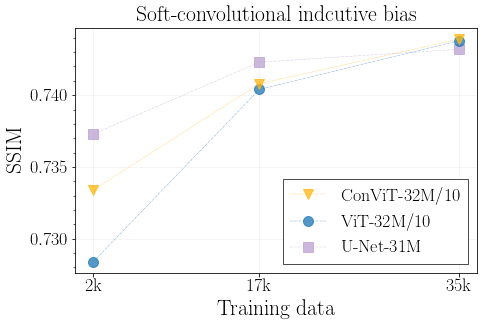

In [4]:
w, h = plt.rcParams["figure.figsize"]
fig, ax = plt.subplots()

""" Model styles """
vits = ViT('s')
vitm = ViT('m')
vitl = ViT('l')

unts = Unet('s')
untm = Unet('m')
untl = Unet('l')

""" Plot Knee """
knee_train_data = [2, 17, 35]
ax.plot(knee_train_data, knee_convit_032M, 'v--', markersize=vitm.ms, alpha=vitm.oc, color='#ffb70f', label='ConViT-32M/10', zorder=5)
ax.plot(knee_train_data, knee_vit_032M, vitm.marker, markersize=vitm.ms, alpha=vitm.oc, color=vitm.color, label=vitm.label, zorder=4)
ax.plot(knee_train_data, knee_unt_031M, untm.marker, markersize=untm.ms, alpha=untm.oc, color=untm.color, label=untm.label, zorder=3)

ax.set_title('Soft-convolutional inductive bias')
ax.set_xticks(knee_train_data)
ax.set_xticklabels(['2k', '17k', '35k'])
ax.tick_params(axis='x', which='minor', bottom=False)
# ax.yaxis.set_ticks(np.arange(0.727, 0.745, 0.005))
ax.legend()

# Labels
ax.set_xlabel('Training data')
ax.set_ylabel('SSIM')

## Save
fig.savefig('convit.pdf', format="pdf", bbox_inches = 'tight')